GIF saved as u1_rotation.gif


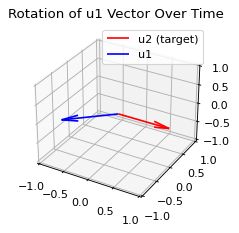

In [ ]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import HTML

# Parameters
kappa = 10.0
D_rot = 0.01
dt = 0.01
n_steps = 200

device = torch.device("cpu")

# Fixed reference vector
u2 = torch.tensor([1.0, 0.0, 0.0], dtype=torch.double, device=device)
u1 = torch.tensor([-1.0, -1.0, 0.0], dtype=torch.double, device=device)

trajectory = []

for step in range(n_steps):
    u1 = u1 / u1.norm()
    u1 = u1.detach()
    u1.requires_grad_(True)

    dot = torch.clamp(torch.dot(u1, u2), -1.0, 1.0)
    energy = 0.5 * kappa * (1.0 - dot * dot)
    energy.backward()

    grad = u1.grad.clone()
    torque = torch.cross(grad, u1)
    noise = torch.randn(3, dtype=torch.double, device=device)
    delta_u = torch.sqrt(torch.tensor(2 * D_rot * dt)) * torch.cross(noise, u1.detach()) \
              + dt * twq1orch.cross(torque, u1.detach())

    u1 = u1.detach() + delta_u
    trajectory.append(u1.detach().cpu().numpy())

trajectory = np.stack(trajectory)

# Set up plot
fig = plt.figure(figsize=(4, 3), dpi=80) 
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])
ax.set_title("Rotation of u1 Vector Over Time")

# Fixed reference vector u2 (red)
ax.quiver(0, 0, 0, *u2.numpy(), color='red', label='u2 (target)')

# Initialize the changing u1 vector (blue)
vec = trajectory[0]
quiver = ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='blue', label='u1')
ax.legend()

def update(frame):
    vec = trajectory[frame]
    # Remove old quiver (only u1 arrow)
    for artist in ax.collections[1:]:
        artist.remove()
    # Draw new u1 arrow
    ax.quiver(0, 0, 0, vec[0], vec[1], vec[2], color='blue')
    return ax,

ani = FuncAnimation(fig, update, frames=len(trajectory), interval=50, blit=False)

from matplotlib.animation import PillowWriter

# Save the animation as a GIF
ani.save("u1_rotation.gif", writer=PillowWriter(fps=30))
print("GIF saved as u1_rotation.gif")

